<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#I.-Обзор-и-обработка-данных" data-toc-modified-id="I.-Обзор-и-обработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>I. Обзор и обработка данных</strong></a></span><ul class="toc-item"><li><span><a href="#1.-Первичный-обзор" data-toc-modified-id="1.-Первичный-обзор-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Первичный обзор</a></span></li><li><span><a href="#2.-Анализ-данных" data-toc-modified-id="2.-Анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Анализ данных</a></span></li><li><span><a href="#3.-Выбор-признаков" data-toc-modified-id="3.-Выбор-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Выбор признаков</a></span></li><li><span><a href="#4.-Сплит-данных-на-выборки" data-toc-modified-id="4.-Сплит-данных-на-выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4. Сплит данных на выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><strong>Выводы</strong></a></span></li></ul></li><li><span><a href="#II.-Построение-моделей" data-toc-modified-id="II.-Построение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>II. Построение моделей</strong></a></span><ul class="toc-item"><li><span><a href="#2.-Модель-«Линейная-регрессия»" data-toc-modified-id="2.-Модель-«Линейная-регрессия»-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2. Модель «Линейная регрессия»</a></span></li><li><span><a href="#3.-Модель-XGBoost" data-toc-modified-id="3.-Модель-XGBoost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>3. Модель XGBoost</a></span></li><li><span><a href="#4.-Модель-LightGBM" data-toc-modified-id="4.-Модель-LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>4. Модель LightGBM</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#III.-Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="III.-Проверка-моделей-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>III. <strong>Проверка моделей на тестовой выборке</strong></a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#IV.-Проверка-моделей-на-вменяемость" data-toc-modified-id="IV.-Проверка-моделей-на-вменяемость-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>IV. Проверка моделей на вменяемость</strong></a></span></li><li><span><a href="#V.-Итоги-исследования" data-toc-modified-id="V.-Итоги-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>V. Итоги исследования</strong></a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><strong>Выводы</strong></a></span></li></ul></li></ul></div>

In [ ]:
# pip install hyperopt

In [ ]:
# pip install xgboost

In [ ]:
# pip install catboost

In [142]:
import pandas as pd

import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import numpy as np

import time

import os

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from lightgbm import LGBMRegressor

from sklearn.dummy import DummyRegressor

 #  **Прогнозирование заказов такси**

**Заказчик** — транспортная компания «Чётенькое такси».

**Цель исследования**:
1. Построить систему, способную предсказать количество заказов такси в следующий час.

**Поставленные задачи**
1. Изучить предоставленные данные и подготовить их для обучения моделей.
2. Обучить разные модели и найти лучшую с предельно меньшим значением RMSE. Максимальный показатель метрики 48.
3. Проверить качество выбранной модели на тестовой выборке размером 10% от исходных данных.

**Дальнейшее использование**

Результаты исследования будут использоваться в дальнейшем при прогнозировании количества привлекаемых водителей в час пик.

**Дополнительно предоставленная инфомарция**

- Имеются исторические данные о заказах такси в аэропортах.
- Ключевые показатели моделей:
    * качество предсказания;
    * скорость предсказания;
    * время обучения.

## **I. Обзор и обработка данных**

### 1. Первичный обзор
Сначала составим представление о полученных исходных данных.

Прочитаем файл `taxi.csv` из папки `/datasets/` и сохраним его в переменной `df`:

In [219]:
pth1 = 'D:/Programs/Jupyter_projects/datasets/taxi.csv'
pth2 = '/datasets/taxi.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, parse_dates = [0], index_col = [0])
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, parse_dates = [0], index_col = [0])
else:
    print('Something is wrong')

Выведем на экран первые пять строк таблицы и получим общую информацию:

In [220]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Итак, в таблице 2 столбца, один из которых мы преобразовали во индексы для анализа временных рядов. Типы данных в столбцах — данные о времени `datetime64` и целые числа `int64`.

Согласно документации к данным:

* `datetime` — дата выгрузки данных
* `num_orders` — количество заказов

Количество значений в столбцах соотнесены полностью. Значит, в данных нет **пропущенных значений**.

In [222]:
df.index.min(), df.index.max()

(Timestamp('2018-03-01 00:00:00'), Timestamp('2018-08-31 23:50:00'))

Данные предоставлены во временном промежутке 01 марта 2018 - 31 августа 2018 года 

### 2. Анализ данных

Посмотрим на временные данные графически

Text(0.5, 1.0, 'Активность заказов 01 марта 2018 - 31 августа 2018 года')

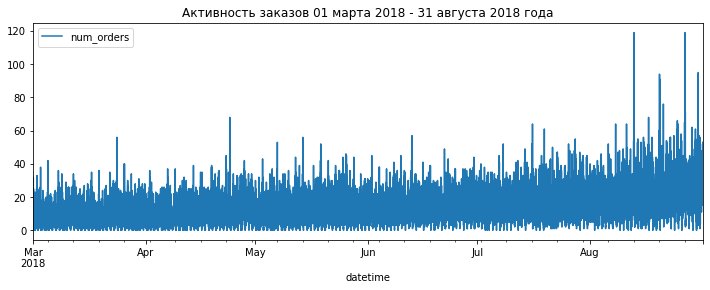

In [223]:
df.plot(figsize = (12,4))
plt.title('Активность заказов 01 марта 2018 - 31 августа 2018 года')

Выполним ресемплинг для наглядного вида сезонности и трендов в предоставленной статистике. Так как информация представлена одним годом, то смысла в данном интервале нет. Построим по часам (чтобы посмотреть характер колебаний), месяцам со средним скользящим

Text(0.5, 1.0, 'Почасовая активность заказов 01 марта 2018 - 31 августа 2018 года')

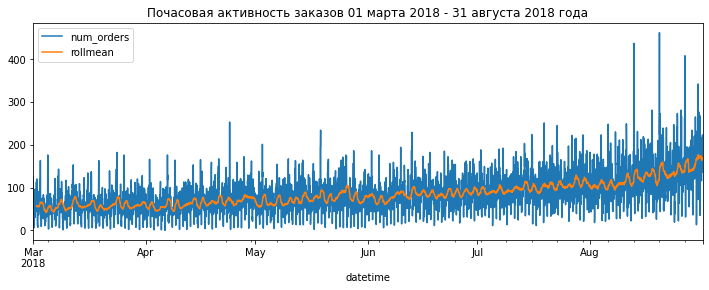

In [224]:
hours = df.resample('1H').sum()
hours['rollmean'] = hours['num_orders'].rolling(24).mean()
hours.plot(figsize = (12,4), ax=plt.gca())
plt.title('Почасовая активность заказов 01 марта 2018 - 31 августа 2018 года')

Text(0.5, 1.0, 'Помесячная активность заказов 01 марта 2018 - 31 августа 2018 года')

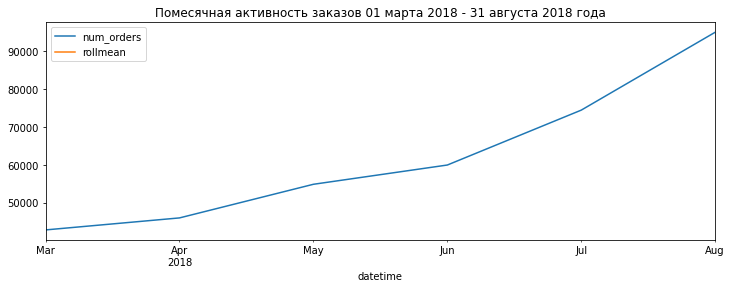

In [225]:
months = df.resample('1M').sum()
months['rollmean'] = months['num_orders'].rolling(7).mean()
months.plot(figsize = (12,4), ax=plt.gca())
plt.title('Помесячная активность заказов 01 марта 2018 - 31 августа 2018 года')

Активность клиентов такси возрастает ближе к лету, что можно объяснить так: люди чаще выезжают загород, отправляются в аэропорты/вокзалы, гуляют до поздней ночи и после этого необходимо доехать до дома.
Нас интересуют данные, ресемплированные по часам.

In [226]:
df = df.resample('1H').sum()
decomposed = seasonal_decompose(df)

Теперь посмотрим на данные поближе по первому месяцу

Text(0.5, 1.0, 'Активность заказов марта 2018 года')

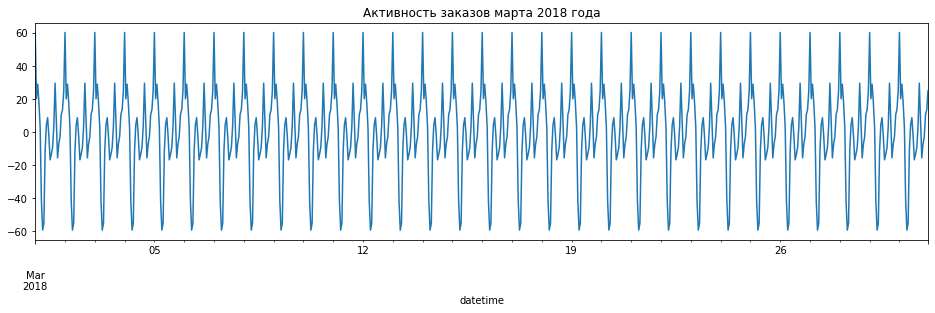

In [227]:
decomposed.seasonal['2018-03-01':'2018-03-30'].plot(figsize = (16,4), ax=plt.gca())
plt.title('Активность заказов марта 2018 года')

Наблюдаем стационарный стохастический процесс

Text(0.5, 1.0, 'Активность заказов первой недели марта 2018 года')

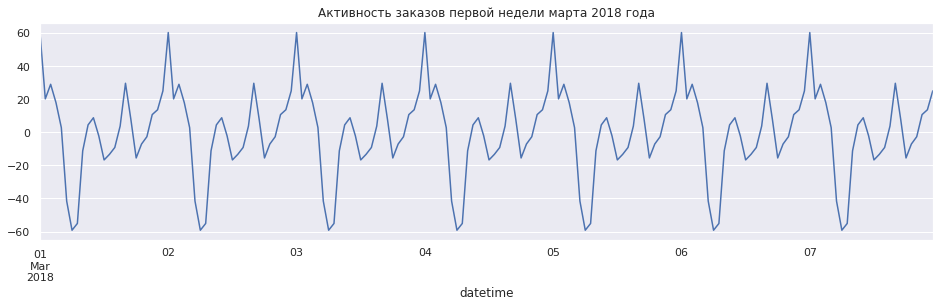

In [358]:
decomposed.seasonal['2018-03-01':'2018-03-07'].plot(figsize = (16,4), ax=plt.gca())
plt.title('Активность заказов первой недели марта 2018 года')

Text(0.5, 1.0, 'Активность заказов марта 2018 года в течение дня')

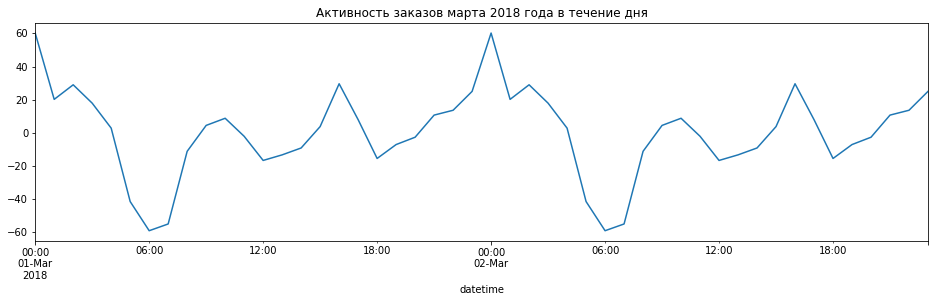

In [228]:
decomposed.seasonal['2018-03-01':'2018-03-02'].plot(figsize = (16,4), ax=plt.gca())
plt.title('Активность заказов марта 2018 года в течение дня')

Как мы видим из-зо дня в день наблюдается похожая картина: количество заказов растет после окончания рабочего дня 18:00 и до полуночи, а также на обеденном перерыве и перед работой.

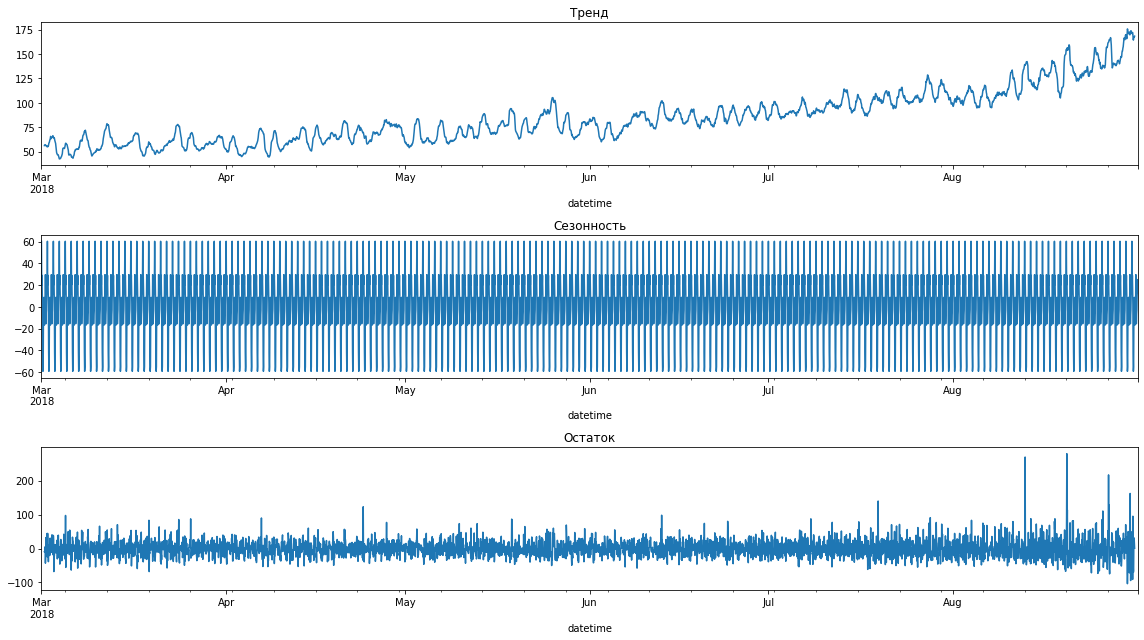

In [229]:
plt.figure(figsize=(16, 9))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остаток')
plt.tight_layout()

### 3. Выбор признаков

Нам необходимо создать группу признаков, по которым будем обучать модели машинного обучения, так как количество заказов - это наш целевой признак. Напишем функцию, чтобы прибавить к таблице новые признаки: час и день недели - есть видимая зависимость изменения количества заказов по часам и по дням недели, отстающие признаки и скользящее среднее.

In [230]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [231]:
make_features(df, 7, 24)

### 4. Сплит данных на выборки

Предоставленные данные представляют собой один единый датафрейм, разделения на обучающую, тестовую выборки у нас сейчас нет. Поэтому выполним это сейчас с помощью алгоритма `train_test_split`. В качестве тестовой выборки возьмем 10% по условию

In [286]:
df = df.dropna()

features = df.drop(['num_orders'], axis = 1)
target = df['num_orders']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, shuffle=False, test_size=0.1, random_state = 12345)

features_subtrain, features_valid, target_subtrain, target_valid = train_test_split(
    features_train, target_train, shuffle=False, test_size=0.2, random_state = 12345)

Проверим разделение выборок

In [287]:
# добавим все выборки в словарь
arrays = {
    'обучающая для лучшей модели' : features_train,
    'подобучающая обучающая' : features_subtrain,
    'валидационная' : features_valid,
    'тестовая' : features_test}

# выведем количество содержащихся объектов
for array_name, array in arrays.items():
    print("\033[4m\033[1m\033[31m{}\033[0m содержит объектов:".format(f'{array_name} выборка'), 
          array.shape[0], f'({array.shape[0]/df.shape[0]:.1%})')

обучающая для лучшей модели выборка содержит объектов: 3952 (90.0%)
подобучающая обучающая выборка содержит объектов: 3161 (72.0%)
валидационная выборка содержит объектов: 791 (18.0%)
тестовая выборка содержит объектов: 440 (10.0%)


### **Выводы**

Каждый объект в наборе данных — временная выгрузка о количестве заказов с интервалом в 10 минут. 
В ходе подготовки данных были проанализированы тренды и сезонность, данные переведены в удобный формат для анализа и обучения, были сделаны некоторые выводы на основании статистики:
- количество заказов увеличивается к началу лета и продолжает расти вплодь до конца августа;
- пик активности клиентов такси приходится на предночное время (до 12 по полуночи) после окончания рабочего времени 18-00. Также наблюдается всплеск заказов перед началом рабочего дня (до 9 утра) и небольшие скачки во время обеденных перерывов.

In [288]:
df.head()

,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean
datetime,,,,,,,,,,,
2018-03-02 00:00:00,90,0,4,58.0,113.0,66.0,61.0,45.0,73.0,44.0,56.833333
2018-03-02 01:00:00,120,1,4,90.0,58.0,113.0,66.0,61.0,45.0,73.0,55.416667
2018-03-02 02:00:00,75,2,4,120.0,90.0,58.0,113.0,66.0,61.0,45.0,56.875000
2018-03-02 03:00:00,64,3,4,75.0,120.0,90.0,58.0,113.0,66.0,61.0,57.041667
2018-03-02 04:00:00,20,4,4,64.0,75.0,120.0,90.0,58.0,113.0,66.0,56.958333


## **II. Построение моделей**

# 1. Модель «Случайный лес»

*С* помощью алгоритма «Случайный лес регрессии» и поддбора гиперпараметров через Hyperopt построим серию моделей и выберем лучшие параметры на валидационной выборке.

In [289]:
space = {'max_depth': hp.choice('max_depth', np.arange(1, 100+1, 2)),
        #'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', np.arange(1, 100+1, 2, dtype=int))
    }

def best_par_hyperopt(features_train, target_train):

    def objective(space):
        
        model_opt = RandomForestRegressor(random_state=12345, 
                                      max_depth = space['max_depth'], 
                                      #min_samples_split = space['min_samples_split'],
                                      n_estimators = space['n_estimators']
                                     )
    
        model_opt.fit(features_subtrain, target_subtrain)
        predictions = model_opt.predict(features_valid)
    
        rmse = round(mean_squared_error(target_valid, predictions) ** .5, 2)

        return {'loss': rmse, 'status': STATUS_OK }
    
    trials = Trials()
    best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials,
            show_progressbar=True)
    
    print(best)

    # засекаем время на обучение лучшей модели
    start_time = time.time()
    
    #лучшую модель будем обучать уже на объединенной обучающей и валидационной
    best_model = (RandomForestRegressor(random_state=12345, 
                                        max_depth = best['max_depth'], 
                                        #min_samples_split = best['min_samples_split'],
                                        n_estimators = best['n_estimators']
                                       )
                  .fit(features_train, target_train))

    predictions = best_model.predict(features_valid)
    rmse_best = round(mean_squared_error(target_valid, predictions) ** .5, 2)
    model_time = round((time.time() - start_time), 5)
    
    print(f'Время выполнения обучения c с лучшими параметрами составляет {model_time:.3f} секунд')
    
    return best, predictions, model_time, rmse_best, best_model

In [290]:
best_forest_param, predictions_forest, best_forest_time, best_forest_rmse, best_forest_model = (
    best_par_hyperopt(features_train, target_train))

100%|██████████| 100/100 [01:25<00:00,  1.17trial/s, best loss: 31.73]
{'max_depth': 15, 'n_estimators': 48}
Время выполнения обучения c с лучшими параметрами составляет 0.859 секунд


100%|██████████| 100/100 [01:25<00:00,  1.17trial/s, best loss: 31.73]

{'max_depth': 15, 'n_estimators': 48}

Время выполнения обучения c с лучшими параметрами составляет 0.859 секунд

### 2. Модель «Линейная регрессия»

In [301]:
start_time = time.time()

model_LR = LinearRegression()
model_LR.fit(features_subtrain, target_subtrain)
predictions_LR = model_LR.predict(features_valid)

model_LR_time = round((time.time() - start_time), 5)

rmse_LR = round(mean_squared_error(target_valid, predictions_LR) ** .5, 2)

print("\033[4m\033[1m\033[31m{}\033[0m {}".format('Средняя ошибка RMSE равна:', f'{rmse_LR:.2f}'))

print("\033[4m\033[1m\033[31m{}\033[0m {}".format('Время обучения равно:', f'{model_LR_time:.5f} секунд'))

Средняя ошибка RMSE равна: 38.98
Время обучения равно: 0.00663 секунд


### 3. Модель XGBoost

In [302]:
space = {'max_depth': hp.choice('max_depth', np.arange(1, 100+1, 2, dtype=int)),
        'n_estimators' : hp.choice('n_estimators', np.arange(1, 100+1, 2, dtype=int)),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.5, 0.02)
    }

def best_par_hyperopt(features_train, target_train):

    def objective(space):
        
        model_opt = xgb.XGBRegressor(random_state=12345, 
                                      max_depth = space['max_depth'], 
                                      n_estimators = space['n_estimators'],
                                      learning_rate=space['learning_rate']
                                     )
    
        model_opt.fit(features_subtrain, target_subtrain)
        predictions = model_opt.predict(features_valid)
    
        rmse = round(mean_squared_error(target_valid, predictions) ** .5, 2)

        return {'loss': rmse, 'status': STATUS_OK }
    
    trials = Trials()
    best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials,
            show_progressbar=True)
    
    print(best)

    # засекаем время на обучение лучшей модели
    start_time = time.time()
    
    best_model = (xgb.XGBRegressor(random_state=12345, 
                                        max_depth = best['max_depth'], 
                                        n_estimators = best['n_estimators'],
                                        learning_rate = best['learning_rate']
                                       )
                  .fit(features_train, target_train))

    predictions = best_model.predict(features_valid)
    rmse_best = round(mean_squared_error(target_valid, predictions) ** .5, 2)
    model_time = round((time.time() - start_time), 5)
    
    print(f'Время выполнения обучения c с лучшими параметрами составляет {model_time:.3f} секунд')
    
    return best, predictions, model_time, rmse_best, best_model

In [303]:
best_XGB_param, predictions_XGB, best_XGB_time, best_XGB_rmse, best_XGB_model = (
    best_par_hyperopt(features_train, target_train))

100%|██████████| 50/50 [07:37<00:00,  9.15s/trial, best loss: 33.16]
{'learning_rate': 0.36, 'max_depth': 3, 'n_estimators': 24}
Время выполнения обучения c с лучшими параметрами составляет 0.731 секунд


### 4. Модель LightGBM

In [263]:
space = {'max_depth': hp.choice ('max_depth', np.arange(10, 100+1, 1, dtype=int)),
        'n_estimators' : hp.choice ('n_estimators', np.arange(10, 100+1, 1, dtype=int))
    }



def best_par_hyperopt(features_train, target_train):
    
    features_subtrain, features_valid, target_subtrain, target_valid = train_test_split(
    features_train, target_train, shuffle=False, test_size=0.25, random_state = 12345)  
    
    def objective(space):
        
        model_opt = LGBMRegressor(random_state=12345, 
                                      max_depth = space['max_depth'], 
                                      n_estimators = space['n_estimators']
                                     )
    
        model_opt.fit(features_subtrain, target_subtrain, verbose=0)
        predictions = model_opt.predict(features_valid)
    
        rmse = round(mean_squared_error(target_valid, predictions) ** .5, 2)

        return {'loss': rmse, 'status': STATUS_OK }
    
    trials = Trials()
    best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials,
            show_progressbar=True)
    
    print(best)

    # засекаем время на обучение лучшей модели
    start_time = time.time()
    
    #лучшую модель будем обучать уже на объединенной обучающей и валидационной
    best_model = (LGBMRegressor(random_state=12345, 
                                        max_depth = best['max_depth'], 
                                        n_estimators = best['n_estimators']
                                       )
                  .fit(features_train, target_train, verbose=0))

    predictions = best_model.predict(features_valid)
    rmse_best = round(mean_squared_error(target_valid, predictions) ** .5, 2)
    model_time = round((time.time() - start_time), 5)
    
    print(f'Время выполнения обучения c с лучшими параметрами составляет {model_time:.3f} секунд')
    
    return best, predictions, model_time, rmse_best, best_model

In [264]:
best_LGBM_param, predictions_LGBM, best_LGBM_time, best_LGBM_rmse, best_LGBM_model = (
    best_par_hyperopt(features_train, target_train))

100%|██████████| 100/100 [00:58<00:00,  1.70trial/s, best loss: 30.63]
{'max_depth': 70, 'n_estimators': 67}
Время выполнения обучения c с лучшими параметрами составляет 0.993 секунд


100%|██████████| 100/100 [00:58<00:00,  1.70trial/s, best loss: 30.63]

{'max_depth': 70, 'n_estimators': 67}

Время выполнения обучения c с лучшими параметрами составляет 0.993 секунд

### Выводы

Получили следующие данных по лучшим моделям на обучении

In [315]:
models_description = [
    ['Случайный лес', best_forest_rmse, best_forest_time, best_forest_param],
    ['Линейная регрессия', rmse_LR, model_LR_time, np.nan],
    ['XGBoost', best_XGB_rmse, best_XGB_time, best_XGB_param],
    ['LightGBM', best_LGBM_rmse, best_LGBM_time, best_LGBM_param],
]

columns_models_description = ['Модель', 'Лучшее качество RMSE при обучении', 
                              'Время выполнения оптимального параметра, сек.', 'Лучшие гиперпараметры']

models_summary = pd.DataFrame(data=models_description, columns=columns_models_description)
models_summary

,Модель,Лучшее качество RMSE при обучении,"Время выполнения оптимального параметра, сек.",Лучшие гиперпараметры
0,Случайный лес,12.21,0.85884,"{'max_depth': 15, 'n_estimators': 48}"
1,Линейная регрессия,38.98,0.00663,NaN
2,XGBoost,25.17,0.73112,"{'learning_rate': 0.36, 'max_depth': 3, 'n_est..."
3,LightGBM,18.52,0.99291,"{'max_depth': 70, 'n_estimators': 67}"


## III. **Проверка моделей на тестовой выборке**

Проверим наши лучшие модели на тестовой выбоке, чтобы убедиться в их качестве

In [316]:
# добавим все лучшие модели в словарь для быстрого доступа к названию и самой модели
models = {'Случайный лес' : best_forest_model,
          'Линейная регрессия' : model_LR,
          'XGBoost' : best_XGB_model,
          'LightGBM' : best_LGBM_model
         }

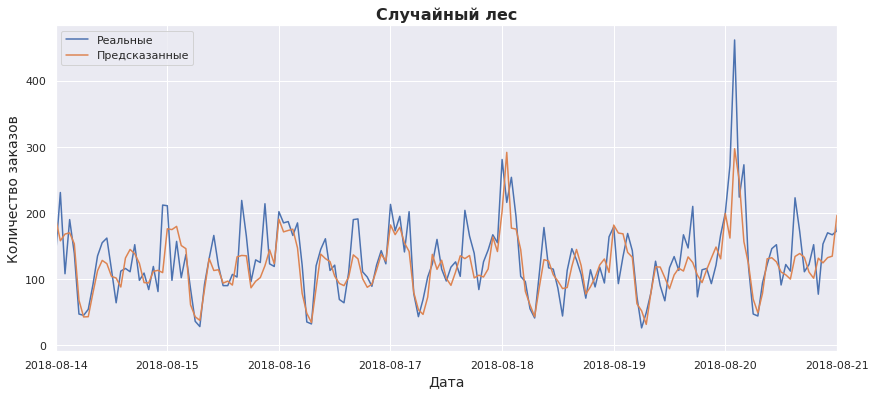

RMSE модели Случайный лес на тестовой выборке: 44.8



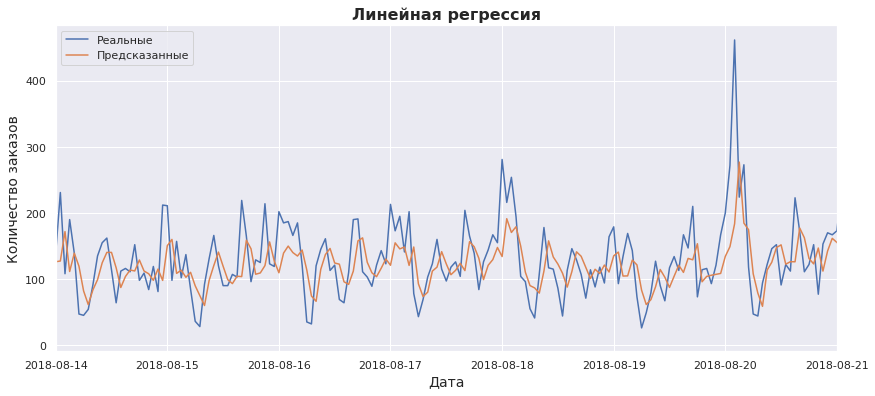

RMSE модели Линейная регрессия на тестовой выборке: 51.36



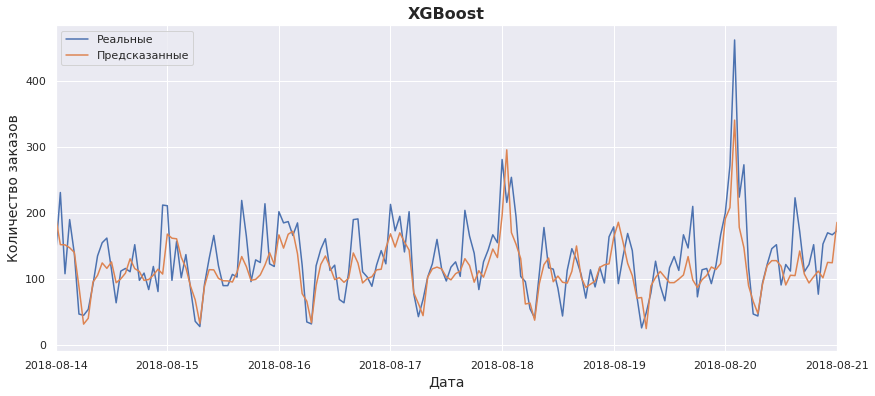

RMSE модели XGBoost на тестовой выборке: 48.48



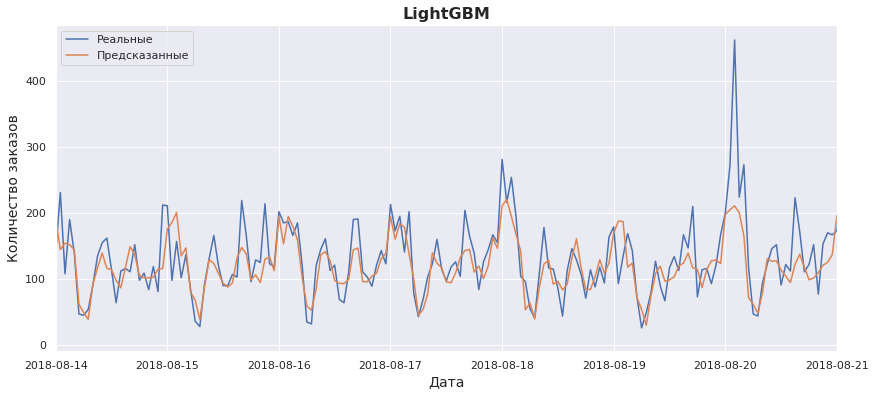

RMSE модели LightGBM на тестовой выборке: 43.2



In [381]:
# создадим пустой список для последующего добавления в обзорную таблицу лучших моделей
rmse_tests = []

sb.set_theme(style="darkgrid")
                
# через цикл, обращаясь к словарю моделей, определим качество моделей по тестовой выборке
for name, model in models.items():
    test_predictions = model.predict(features_test)
    rmse_test = round(mean_squared_error(target_test, test_predictions) ** .5, 2)
    rmse_tests.append(rmse_test)
    
    plt.title(name, fontsize=16, fontweight="bold")
    # ограничимся неделей
    plt.xlim(pd.Timestamp('2018-08-14'), pd.Timestamp('2018-08-21'))
    sb.lineplot(x= target_test.index,
                 y= target_test, label = 'Реальные')
    sb.lineplot(x= target_test.index,
                 y= test_predictions, label = 'Предсказанные')
    plt.gcf().set_size_inches(14, 6)
    plt.xlabel('Дата', fontsize=14)
    plt.ylabel('Количество заказов', fontsize=14)
    
    plt.show()
    
    print(f'RMSE модели {name} на тестовой выборке:', rmse_test)
    print()
    
# создадим новый столбец в выводной таблице по лучшим моделям
models_summary['Качество при тесте'] = rmse_tests

Сравнение для одного дня 2018-08-14

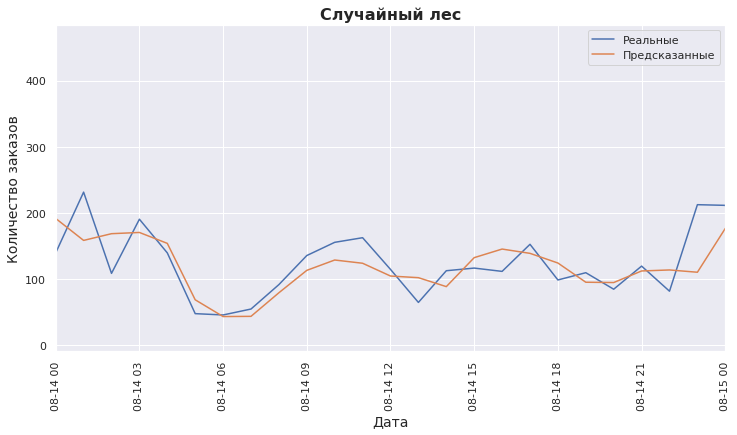

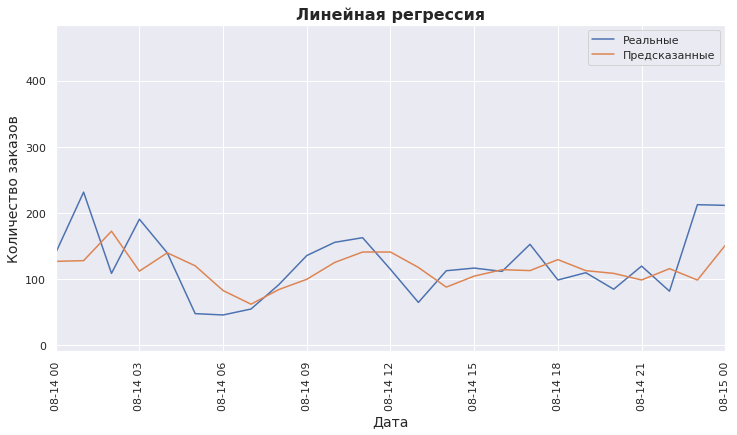

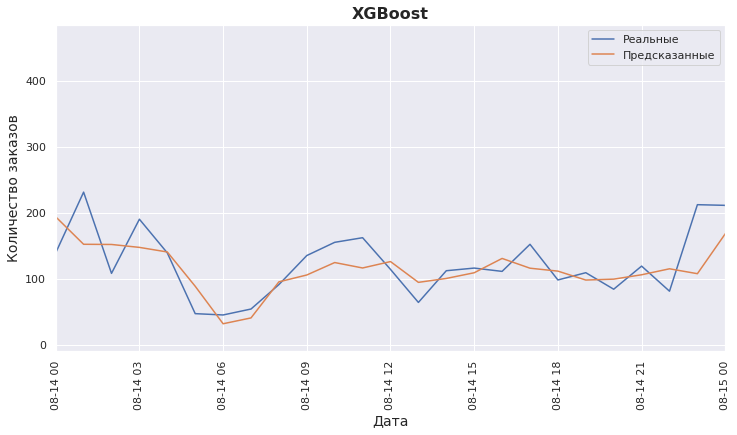

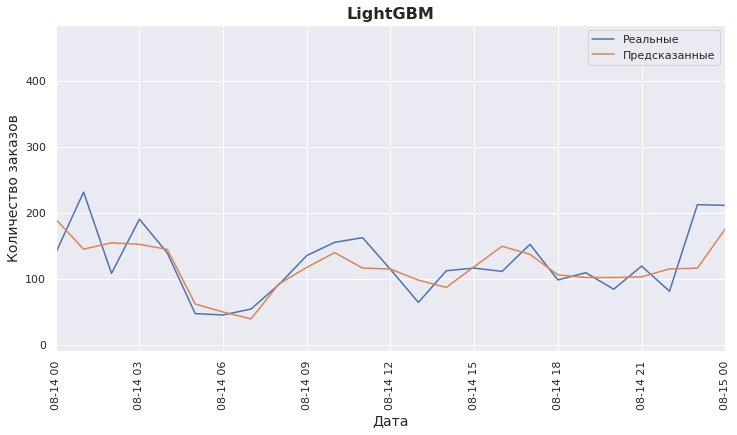

In [401]:
for name, model in models.items():
    test_predictions = model.predict(features_test)
    
    plt.title(name, fontsize=16, fontweight="bold")
    # ограничимся неделей
    plt.xlim(pd.Timestamp('2018-08-14 00:00:00'), pd.Timestamp('2018-08-15 00:00:00'))
    sb.lineplot(x= target_test.index,
                 y= target_test, label = 'Реальные')
    sb.lineplot(x= target_test.index,
                 y= test_predictions, label = 'Предсказанные')
    plt.gcf().set_size_inches(12, 6)
    plt.xlabel('Дата', fontsize=14)
    plt.ylabel('Количество заказов', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()

Выведем еще раз итоговую таблицу

In [346]:
models_summary.sort_values(by='Качество при тесте', ascending=True)

,Модель,Лучшее качество RMSE при обучении,"Время выполнения оптимального параметра, сек.",Лучшие гиперпараметры,Качество при тесте
3,LightGBM,18.52,0.99291,"{'max_depth': 70, 'n_estimators': 67}",43.20
0,Случайный лес,12.21,0.85884,"{'max_depth': 15, 'n_estimators': 48}",44.80
2,XGBoost,25.17,0.73112,"{'learning_rate': 0.36, 'max_depth': 3, 'n_est...",48.48
1,Линейная регрессия,38.98,0.00663,NaN,51.36


### Выводы

По итогу проверки на тестовых данных:
* модель LightGBM и Случайный лес показали лучшее качество.

## **IV. Проверка моделей на вменяемость**

Также проверим наши модели на адекватность сравнив их со случайными результатами, которые игнорируют правило входных данных. И если модель ведет себя лучше, то значит она может извлекать какой-то сигнал из данных и имеет предсказательную силу.
Для этого воспользуемся `sklearn.dummy.DummyRegressor`

In [347]:
X = features_test
y = target_test
dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X, y)
dummy_predictions = dummy_reg.predict(X)

print(f'RMSE: {round(mean_squared_error(target_test, dummy_predictions) ** .5, 2)}')

RMSE: 58.81


Наши лучшие модели показали качество лучше, чем случаная, следовательно имеет смысл использовать модели машинного обучения.

## **V. Итоги исследования**

### **Выводы**

В ходе подготовки данных были проанализированы тренды и сезонность, данные переведены в удобный формат для анализа и обучения, были сделаны некоторые выводы на основании статистики:
- количество заказов увеличивается к началу лета и продолжает расти вплодь до конца августа;
- пик активности клиентов такси приходится на предночное время (до 12 по полуночи) после окончания рабочего времени 18-00. Также наблюдается всплеск заказов перед началом рабочего дня (до 9 утра) и небольшие скачки во время обеденных перерывов.

На основании обработанных данных мы создали несколько моделей, выбрали лучшие, подобрали оптимальные гиперпараметры и проверили их на адекватность. И вот что у нас получилось:

In [348]:
models_summary.sort_values(by='Качество при тесте', ascending=True)

,Модель,Лучшее качество RMSE при обучении,"Время выполнения оптимального параметра, сек.",Лучшие гиперпараметры,Качество при тесте
3,LightGBM,18.52,0.99291,"{'max_depth': 70, 'n_estimators': 67}",43.20
0,Случайный лес,12.21,0.85884,"{'max_depth': 15, 'n_estimators': 48}",44.80
2,XGBoost,25.17,0.73112,"{'learning_rate': 0.36, 'max_depth': 3, 'n_est...",48.48
1,Линейная регрессия,38.98,0.00663,NaN,51.36


Лучшей моделью для решения поставленной цели будет являться модель на основе алгоритма LightGBM.